In [51]:
# Making sure our results are reproducible
from numpy.random import seed
seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)

In [60]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from dragonn.tutorial_utils import *
from dragonn.utils import *
from dragonn.positional_prc import * 
from dragonn.callbacks import * 


In [57]:
motif_density_localization_simulation_parameters = {
    "motif_name": "TAL1_known4",
    "seq_length": 1500,
    "center_size": 150,
    "min_motif_counts": 2,
    "max_motif_counts": 4, 
    "num_pos": 3000,
    "num_neg": 3000,
    "GC_fraction": 0.4}

In [58]:
simulation_data = get_simulation_data("simulate_motif_density_localization",
                                      motif_density_localization_simulation_parameters,
                                      validation_set_size=1000, test_set_size=1000)

In [61]:
#To prepare for model training, we import the necessary functions and submodules from keras
from keras.models import Sequential
from keras.layers.core import Dropout, Reshape, Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta, SGD, RMSprop;
import keras.losses;
from keras.constraints import maxnorm;
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, History
from keras import backend as K 
K.set_image_data_format('channels_last')


In [62]:
#We define a custom callback to print training and validation metrics while training. 
metrics_callback=MetricsCallback(train_data=(simulation_data.X_train,simulation_data.y_train),
                                 validation_data=(simulation_data.X_valid,simulation_data.y_valid))

#Define the model architecture in keras
multi_filter_keras_model=Sequential() 
multi_filter_keras_model.add(Conv2D(filters=15,kernel_size=(1,10),input_shape=simulation_data.X_train.shape[1::]))
multi_filter_keras_model.add(Activation('relu'))
multi_filter_keras_model.add(MaxPooling2D(pool_size=(1,35)))
multi_filter_keras_model.add(Flatten())
multi_filter_keras_model.add(Dense(1))
multi_filter_keras_model.add(Activation("sigmoid"))

##compile the model, specifying the Adam optimizer, and binary cross-entropy loss. 
multi_filter_keras_model.compile(optimizer='adam',
                               loss='binary_crossentropy')

In [63]:
## use the keras fit function to train the model for 150 epochs with early stopping after 3 epochs 
history_multi_filter=multi_filter_keras_model.fit(x=simulation_data.X_train,
                                  y=simulation_data.y_train,
                                  batch_size=128,
                                  epochs=150,
                                  verbose=0,
                                  callbacks=[EarlyStopping(patience=3),
                                            History(),
                                            metrics_callback],
                                  validation_data=(simulation_data.X_valid,
                                                   simulation_data.y_valid))


Training Data:
Loss: 0.6905	Balanced Accuracy: 52.91%	 auROC: 0.544	 auPRC: 0.538
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.6947	Balanced Accuracy: 50.84%	 auROC: 0.516	 auPRC: 0.500
	Recall at 5%|10%|20% FDR: 0.6%|0.6%|0.6%	 Num Positives: 481	 Num Negatives: 519
Training Data:
Loss: 0.6891	Balanced Accuracy: 53.53%	 auROC: 0.582	 auPRC: 0.573
	Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.6913	Balanced Accuracy: 51.39%	 auROC: 0.538	 auPRC: 0.519
	Recall at 5%|10%|20% FDR: 0.6%|0.6%|0.6%	 Num Positives: 481	 Num Negatives: 519
Training Data:
Loss: 0.6775	Balanced Accuracy: 58.31%	 auROC: 0.628	 auPRC: 0.619
	Recall at 5%|10%|20% FDR: 0.3%|0.5%|1.9%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.6845	Balanced Accuracy: 55.03%	 auROC: 0.574	 auPRC: 0.550
	Recall at 5%|10%|20% FDR: 0.6%|0.6%|0.6%	 Num Positives: 481	 Num Negatives: 519
Trai

Training Data:
Loss: 0.1638	Balanced Accuracy: 93.89%	 auROC: 0.986	 auPRC: 0.985
	Recall at 5%|10%|20% FDR: 92.0%|97.7%|99.7%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.1962	Balanced Accuracy: 91.55%	 auROC: 0.979	 auPRC: 0.977
	Recall at 5%|10%|20% FDR: 84.2%|92.5%|99.2%	 Num Positives: 481	 Num Negatives: 519
Training Data:
Loss: 0.1616	Balanced Accuracy: 94.03%	 auROC: 0.986	 auPRC: 0.985
	Recall at 5%|10%|20% FDR: 92.3%|97.9%|99.7%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.1969	Balanced Accuracy: 91.88%	 auROC: 0.979	 auPRC: 0.977
	Recall at 5%|10%|20% FDR: 84.2%|92.3%|99.4%	 Num Positives: 481	 Num Negatives: 519
Training Data:
Loss: 0.1586	Balanced Accuracy: 94.15%	 auROC: 0.987	 auPRC: 0.986
	Recall at 5%|10%|20% FDR: 92.8%|98.0%|99.7%	 Num Positives: 2018	 Num Negatives: 1982
Validation Data:
Loss: 0.1933	Balanced Accuracy: 91.34%	 auROC: 0.979	 auPRC: 0.977
	Recall at 5%|10%|20% FDR: 84.2%|92.3%|99.4%	 Num Positives: 481	 Num N

In [64]:
## Use the keras predict function to get model predictions on held-out test set. 
test_predictions=multi_filter_keras_model.predict(simulation_data.X_test)
## Generate a ClassificationResult object to print performance metrics on held-out test set 
print(ClassificationResult(simulation_data.y_test,test_predictions))

Loss: 0.1678	Balanced Accuracy: 93.29%	 auROC: 0.984	 auPRC: 0.981
	Recall at 5%|10%|20% FDR: 90.2%|97.2%|99.4%	 Num Positives: 501	 Num Negatives: 499


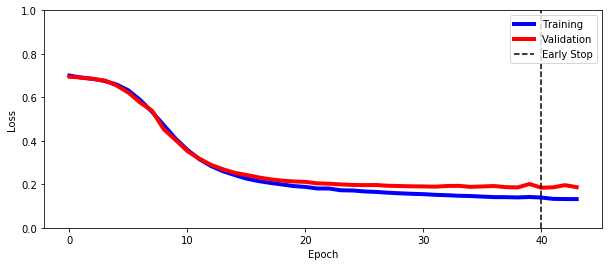

In [67]:
## Visualize the model's performance 
plot_learning_curve(history_multi_filter)

In [68]:
motif_scores=get_motif_scores(simulation_data.X_valid,simulation_data.motif_names)

In [70]:
motif_scores.shape

(1000, 1, 1500)

In [66]:
#get the indices of the first positive and negative examples in the validation data split
pos_indx=np.flatnonzero(simulation_data.y_valid==1)[0]
print(pos_indx)
pos_X=simulation_data.X_valid[pos_indx:pos_indx+1]

neg_indx=np.flatnonzero(simulation_data.y_valid==0)[1]
print(neg_indx)
neg_X=simulation_data.X_valid[neg_indx:neg_indx+1]

2
1


### Motif Scores

In [31]:
pos_motif_scores=get_motif_scores(pos_X,simulation_data.motif_names,return_positions=True).squeeze()
neg_motif_scores=get_motif_scores(neg_X,simulation_data.motif_names,return_positions=True).squeeze()

Text(0.5, 1.0, 'Positive example')

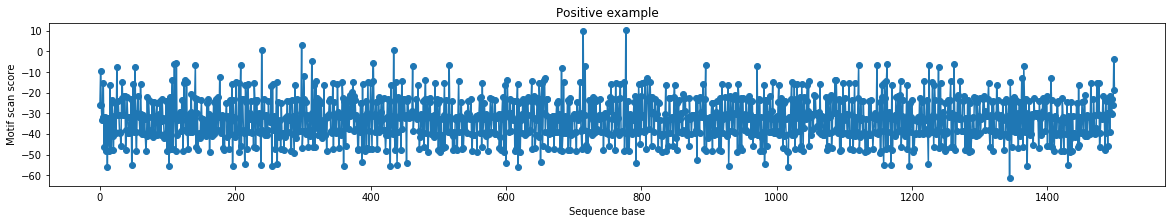

In [32]:
plt.figure(figsize=(20,3))
plt.plot(pos_motif_scores, "-o")
plt.xlabel("Sequence base")
plt.ylabel("Motif scan score")
plt.title("Positive example")


Text(0.5, 1.0, 'Negative example')

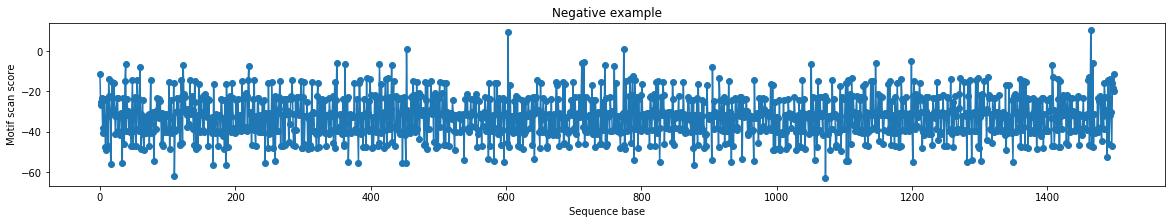

In [34]:
plt.figure(figsize=(20,3))
plt.plot(neg_motif_scores, "-o")
plt.xlabel("Sequence base")
plt.ylabel("Motif scan score")
plt.title("Negative example")


In [45]:
simulation_data.valid_embeddings[0][0].__dict__

{'what': <simdna.synthetic.StringEmbeddable at 0x7fe72fe58860>,
 'startPos': 1074}

The motif scan yields a group of three high-scoring motif alignment positions at a fixed distance near the center of the sequence in the positive example. The spacing of the high-scoring motif alignments is random in the negative sequence. 

### In silico mutagenesis 

To determine how much each position in the input sequence contrinbutes to the model's prediction, we can perform saturation mutagenesis on the sequence. For each position in the input sequence, we introduce each of the four possible bases A, C, G, T and quantify the effect on the model's predictions.


TODO: Explain what ISM is doing, equation from dragonn code. 
TODO: Update ISM to reflect the difference of logits. 

In [17]:
from dragonn.tutorial_utils import in_silico_mutagenesis, plot_ism
ism_pos=in_silico_mutagenesis(multi_filter_keras_model,pos_X)
ism_neg=in_silico_mutagenesis(multi_filter_keras_model,neg_X)

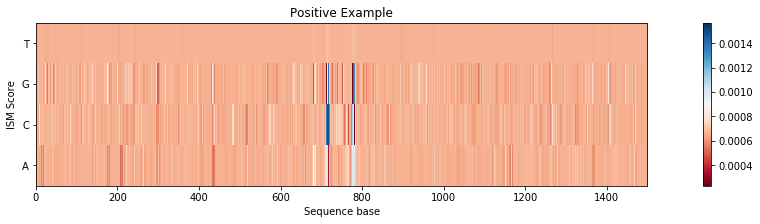

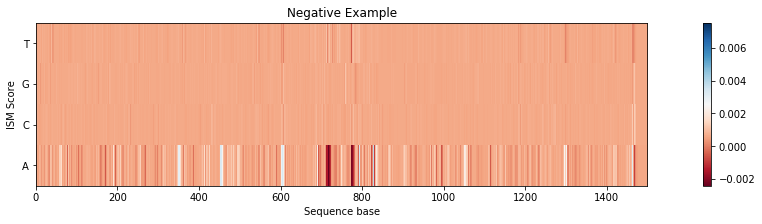

In [18]:
# create discrete colormap of ISM scores 
from dragonn.tutorial_utils import plot_ism
plot_ism(ism_pos,"Positive Example")
plot_ism(ism_neg,"Negative Example")

### Gradient x Input 

Consider a neural net being a function: $f(x_1, ..., x_N; w) = y$

One way to tell whether the input feature is important is to compute the gradient of the function with respect to (w.r.t.) model input: $\frac{\partial f}{\partial x_i}$

This approach is called saliency maps: "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", by Karen Simonyan, Andrea Vedaldi and Andrew Zisserma https://arxiv.org/pdf/1312.6034.pdf

In genomics, we typically visualize only gradients for bases observed in the sequence (called input masked gradients or input*grad).

In [19]:
from dragonn.tutorial_utils import  input_grad,plot_seq_importance

In [20]:
gradinput_pos=input_grad(multi_filter_keras_model,pos_X)
gradinput_neg=input_grad(multi_filter_keras_model,neg_X)

Positive:


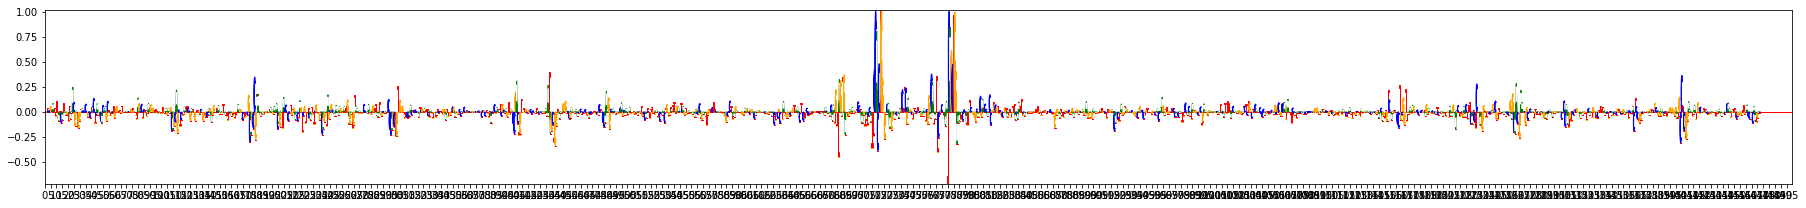

In [21]:
print("Positive:")
plot_seq_importance(gradinput_pos,pos_X)


Negative:


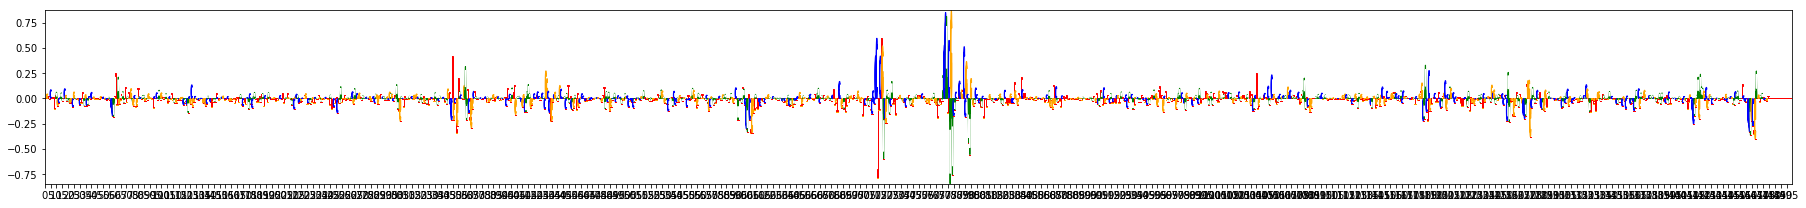

In [22]:
print("Negative:")
plot_seq_importance(gradinput_neg,neg_X)

Let's zoom in to the center 150 bp of the sequence, where the simulated homotypic motif grammar is to be found. 

Positive:


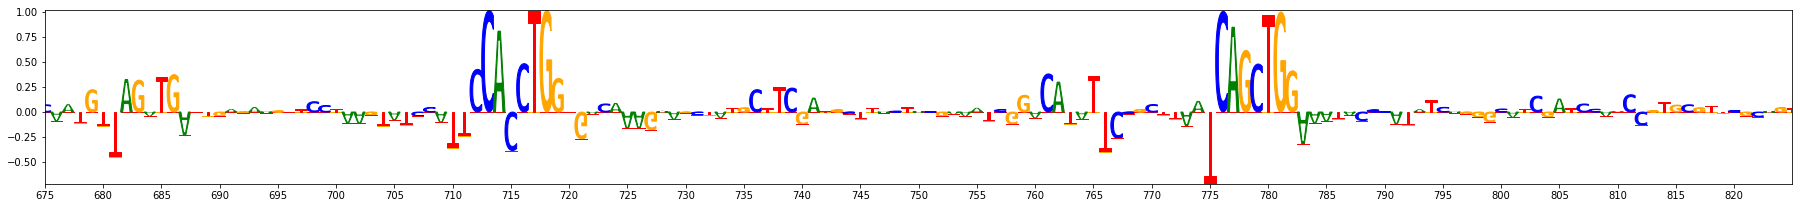

In [23]:
print("Positive:")
plot_seq_importance(gradinput_pos,pos_X,xlim=(675,825))

Negative:


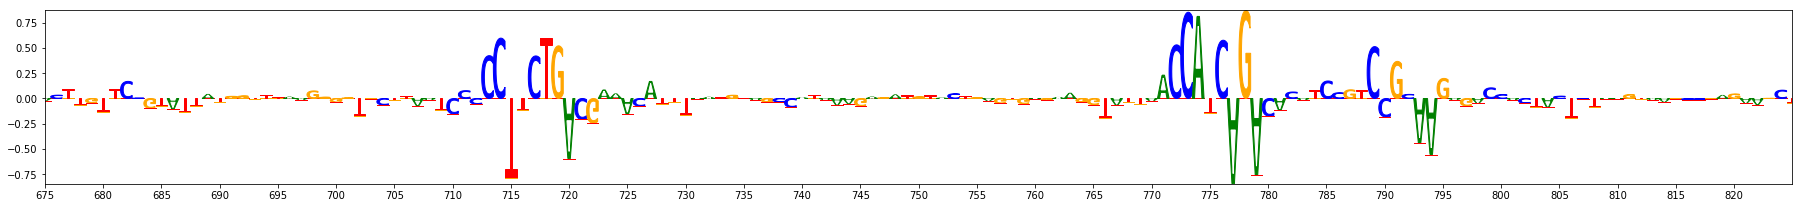

In [24]:
print("Negative:")
plot_seq_importance(gradinput_neg,neg_X,xlim=(675,825))

### DeepLIFT

[DeepLIFT](https://arxiv.org/pdf/1605.01713v2.pdf) allows us to obtain scores for specific sequence indicating the importance of each position in the sequence. DeepLIFT can accept a custom reference. For our purposes, we provide a 40% GC reference. 


TODO: use a dinucleotide-shuffled reference. 


In [25]:
from dragonn.tutorial_utils import deeplift

dl_pos=deeplift(multi_filter_keras_model,pos_X)
dl_neg=deeplift(multi_filter_keras_model,neg_X)

Positive:


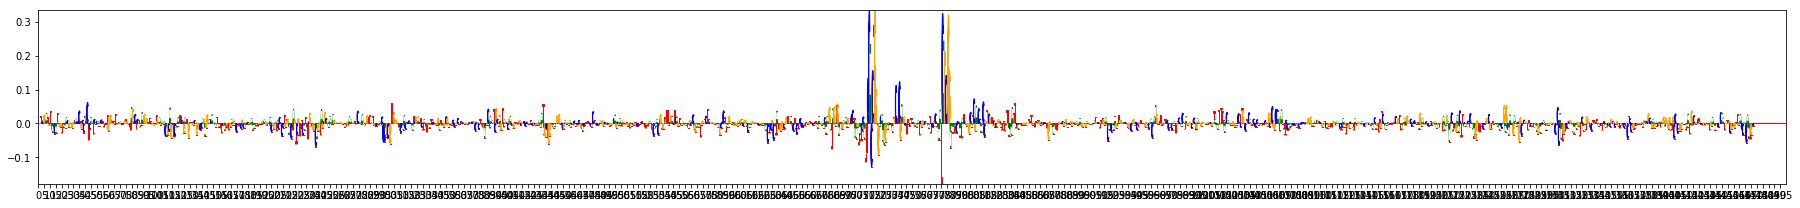

In [26]:
print("Positive:")
plot_seq_importance(dl_pos,pos_X)


Negative:


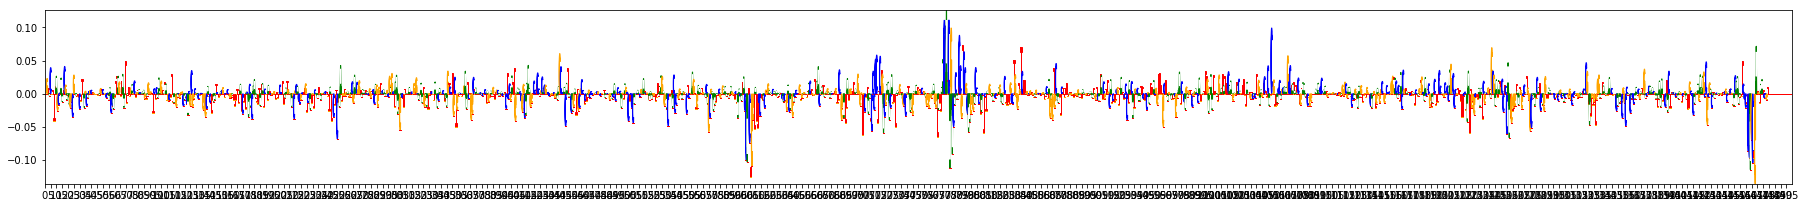

In [27]:
print("Negative:")
plot_seq_importance(dl_neg,neg_X)

Zooming in to the 150 bases at the center of the sequence: 

Positive:


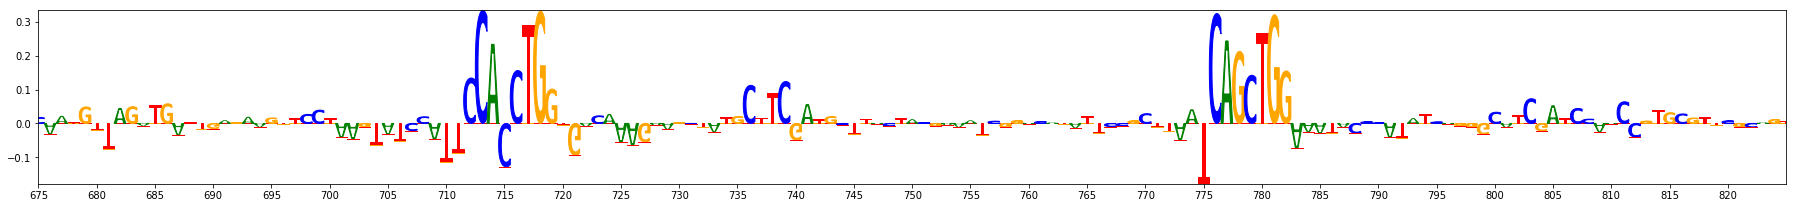

In [28]:
print("Positive:")
plot_seq_importance(dl_pos,pos_X,xlim=(675,825))

Negative:


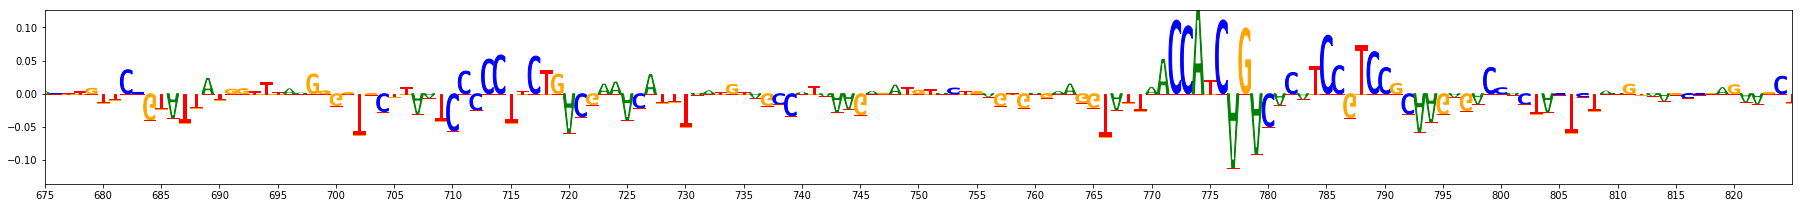

In [29]:
print("Negative:")
plot_seq_importance(dl_neg,neg_X,xlim=(675,825))